<a href="https://colab.research.google.com/github/adityakshay/Machine-Learning/blob/master/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In [0]:
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plot

In [0]:
train_X = [[1],[2],[3],[4],[5],[6],[7],[8],[9] ]

In [0]:
train_y = [1, 8, 27, 64, 125, 216, 343, 512, 729]
#train_y = [1, 4, 9, 16, 25, 36, 49, 64, 81]

In [0]:
from sklearn.linear_model import LinearRegression
from  sklearn import tree 

In [236]:
reg1 = LinearRegression()
reg2=tree.DecisionTreeRegressor()
reg1.fit(train_X, train_y)
reg2.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

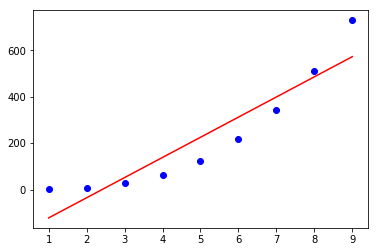

In [237]:
plot.scatter(train_X, train_y, color='blue')
plot.plot(train_X, reg1.predict(train_X), color='red')

In [238]:
reg1.predict([[11]])

array([745.8])

In [239]:
reg2.predict([[12]])

array([729.])

# Tensorflow based implementation

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [0]:
# Create weights and bias
W = tf.Variable(tf.random_normal(shape=(1,)), name='weight')
b = tf.Variable(tf.random_normal(shape=(1,)), name='bias')

In [0]:
# Define NN parameters
learning_rate = 0.000001
epochs =1000
display_step = 100

In [0]:
pred = tf.pow(X, W)

In [0]:
num_records= len(train_X)

In [0]:
# Define Cost function
#cost = tf.reduce_sum(tf.pow(pred-Y, 3))/(num_records)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(num_records)

# Have optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Populating the interactive namespace from numpy and matplotlib
Epoch: 100 cost =  972828.68750
[0.21957216]
Epoch: 200 cost =  971217.81250
[0.38409904]
Epoch: 300 cost =  967668.12500
[0.6331673]
Epoch: 400 cost =  951884.87500
[1.1632847]
Epoch: 500 cost =  1045560.00000
[3.]
Epoch: 600 cost =  1045560.00000
[3.]
Epoch: 700 cost =  1045560.00000
[3.]
Epoch: 800 cost =  1045560.00000
[3.]
Epoch: 900 cost =  1045560.00000
[3.]
Epoch: 1000 cost =  1045560.00000
[3.]
Completed model training
 Cost post training=  1045560.0 W =  [3.]
[[1331.]]


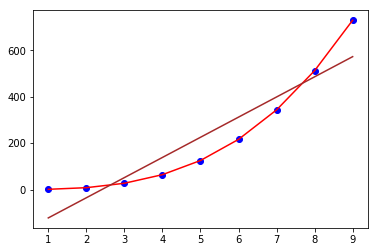

In [329]:
% pylab inline
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(epochs):
    
    for (x, y ) in zip(train_X, train_y):
      sess.run([optimizer,cost], feed_dict={X:x, Y:y})
      
    if(epoch+1) % display_step ==0:
      c =  sess.run(cost, feed_dict={X: train_X, Y:train_y})
      print('Epoch:', '%d' % (epoch+1), 'cost = ', '{:.5f}'.format(c))
      print(sess.run(W))
      
  print('Completed model training')   
  training_cost = sess.run(cost,  feed_dict={X: train_X, Y:train_y})
  
  print(' Cost post training= ',training_cost, 'W = ', sess.run(W))
  #print(' Cost post training= ',training_cost, 'W = ', sess.run(W), 'bias = ', sess.run(b))
  
  plot(train_X, train_y, 'bo')
  plot(train_X,  train_X ** sess.run(W) , 'r')
  #plot(train_X, sess.run(W) * train_X + sess.run(b), 'r')
  plot(train_X, reg1.predict(train_X), color='brown')
  #plot(train_X, reg2.predict(train_X), color='green')
  tf_weight = sess.run(W)
  print( [[11]] ** sess.run(W))  
  

In [331]:
np.set_printoptions(suppress=True)

#Let's find out which model accurately predicts square of 15
test=[[15],[-5],[6],[16],[200]]
print(f'OLS Model-{reg1.predict(test)}' )
print(f'Decision Tree Model-{reg2.predict(test)}' )
print(f'Tensorflow Model -{ (test) ** tf_weight}' )


OLS Model-[ 1093.   -643.    311.8  1179.8 17151. ]
Decision Tree Model-[729.   1. 216. 729. 729.]
Tensorflow Model -[[   3375.]
 [   -125.]
 [    216.]
 [   4096.]
 [8000000.]]
